**Завдання 1. Побудуємо конволюційну мережу для розпізнавання рукописних цифр за вказаною технологією.**

Імпортуємо всі необхідні бібліотеки для виконання завдання

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Завантажимо датасет

In [2]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

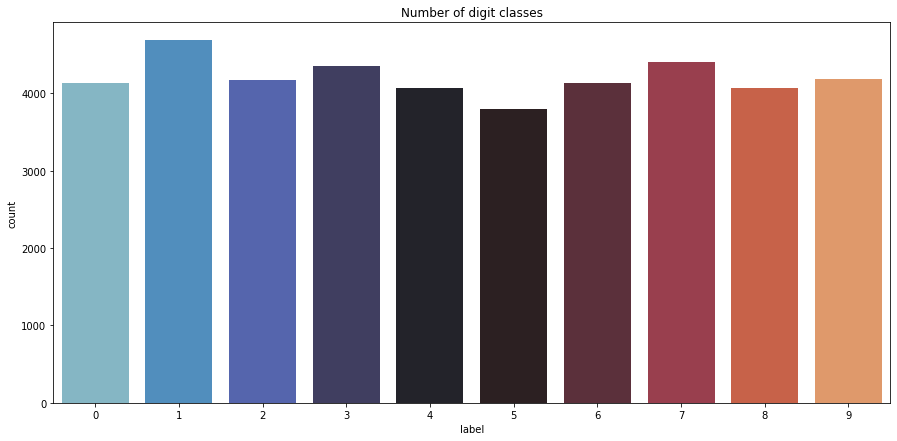

In [4]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

Нормалізуємо наші дані для правильної та швидшої обробки

In [5]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [7]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

Розіб'ємо датасет на 90% тренувального та 10% тестового.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1
, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


Перейдемо до створення моделі згорткової нейронної мережі

In [9]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [10]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
epochs = 10
batch_size = 250

In [12]:
datagen = ImageDataGenerator(
featurewise_center=False, # set input mean to 0 over the dataset
samplewise_center=False, # set each sample mean to 0
featurewise_std_normalization=False, # divide inputs by std of the dataset
samplewise_std_normalization=False, # divide each input by its std
zca_whitening=False, # dimesion reduction
rotation_range=0.5, # randomly rotate images in the range 5 degrees
zoom_range = 0.5, # Randomly zoom image 5%
width_shift_range=0.5, # randomly shift images horizontally 5%
height_shift_range=0.5, # randomly shift images vertically 5%
horizontal_flip=False, # randomly flip images
vertical_flip=False) # randomly flip images
datagen.fit(X_train)

Тренування моделі

In [13]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 28s 181ms/step - loss: 2.1616 - accuracy: 0.1993 - val_loss: 1.6641 - val_accuracy: 0.4798
Epoch 2/10
151/151 [==============================] - 27s 180ms/step - loss: 1.8787 - accuracy: 0.3363 - val_loss: 1.1244 - val_accuracy: 0.7229
Epoch 3/10
151/151 [==============================] - 27s 180ms/step - loss: 1.6945 - accuracy: 0.4082 - val_loss: 0.8122 - val_accuracy: 0.7912
Epoch 4/10
151/151 [==============================] - 27s 181ms/step - loss: 1.5950 - accuracy: 0.4447 - val_loss: 0.6246 - val_accuracy: 0.8564
Epoch 5/10
151/151 [==============================] - 27s 181ms/step - loss: 1.5083 - accuracy: 0.4786 - val_loss: 0.4848 - val_accuracy: 0.8817
Epoch 6/10
151/151 [==============================] - 27s 180ms/step - loss: 1.4647 - accuracy: 0.4995 - val_loss: 0.4291 - val_accuracy: 0.8981
Epoch 7/10
151/151 [==============================] - 27s 180ms/step - loss: 1.4077 - accuracy: 0.5189 - val_loss: 0.3743 - val_ac

Тестування моделі


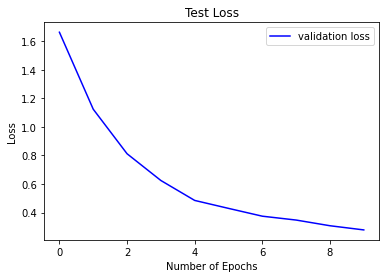

In [14]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

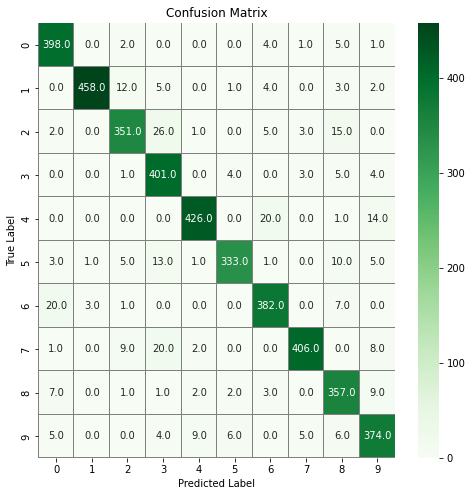

In [15]:
import seaborn as sns
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            cmap="Greens",linecolor="gray",
            fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Завдання 2. Поміняти алгоритм навчання (оптимізатор) і порівняти результати точності.**

In [22]:
optimizer = ['adam', 'rmsprop', 'nadam', 'adamax']
models = []

for i in range(4):
  models.append(Sequential([
                            Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                                   activation ='relu'),
                            MaxPool2D(pool_size=(2,2), strides=(2,2)),
                            Dropout(0.25),
                           
                            Flatten(),
                            Dense(256, activation = "relu"),
                            Dropout(0.5),
                            Dense(10, activation = "softmax")]))

  models[i].compile(optimizer=optimizer[i],  loss = "categorical_crossentropy", metrics=["accuracy"])

In [29]:
histories = []

for i in range(4):
  histories.append(models[i].fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size))

Epoch 1/10
151/151 [==============================] - 26s 170ms/step - loss: 2.1971 - accuracy: 0.1819 - val_loss: 1.7333 - val_accuracy: 0.4886
Epoch 2/10
151/151 [==============================] - 26s 170ms/step - loss: 1.9086 - accuracy: 0.3188 - val_loss: 1.1852 - val_accuracy: 0.7200
Epoch 3/10
151/151 [==============================] - 26s 169ms/step - loss: 1.7016 - accuracy: 0.4035 - val_loss: 0.7875 - val_accuracy: 0.8252
Epoch 4/10
151/151 [==============================] - 26s 170ms/step - loss: 1.5778 - accuracy: 0.4533 - val_loss: 0.6484 - val_accuracy: 0.8374
Epoch 5/10
151/151 [==============================] - 25s 168ms/step - loss: 1.4997 - accuracy: 0.4806 - val_loss: 0.5379 - val_accuracy: 0.8590
Epoch 6/10
151/151 [==============================] - 26s 169ms/step - loss: 1.4517 - accuracy: 0.5016 - val_loss: 0.4492 - val_accuracy: 0.8905
Epoch 7/10
151/151 [==============================] - 26s 169ms/step - loss: 1.4122 - accuracy: 0.5169 - val_loss: 0.4022 - val_ac

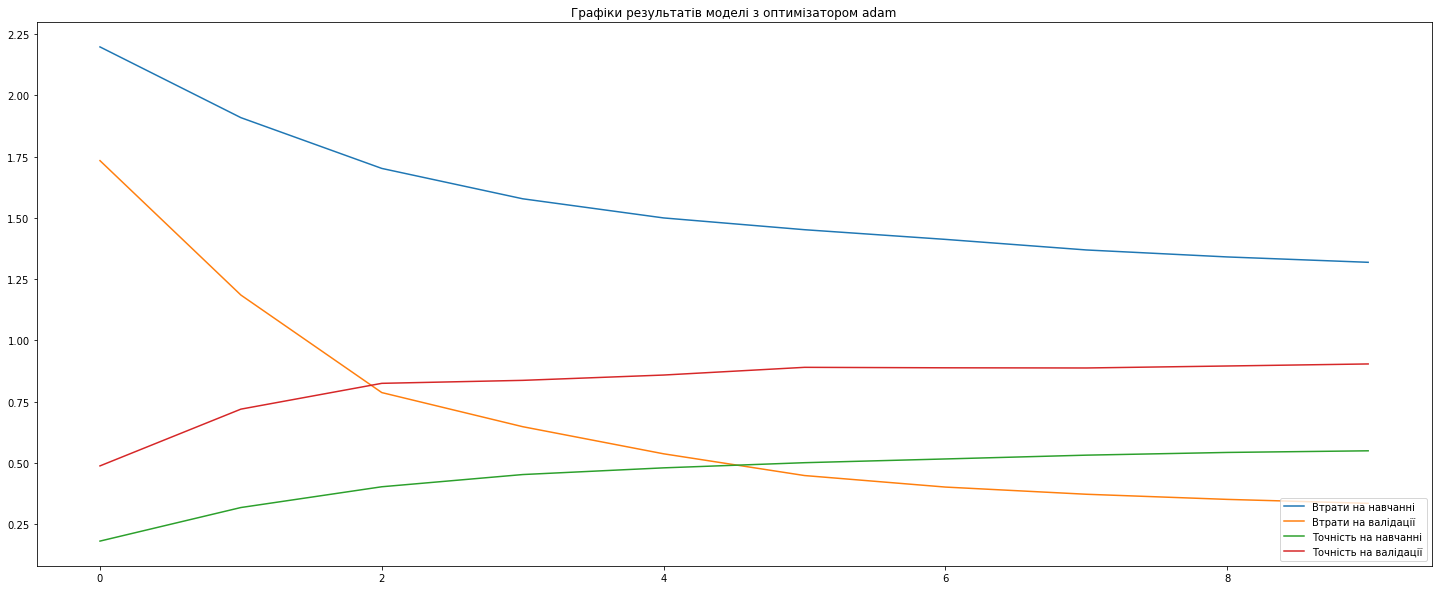

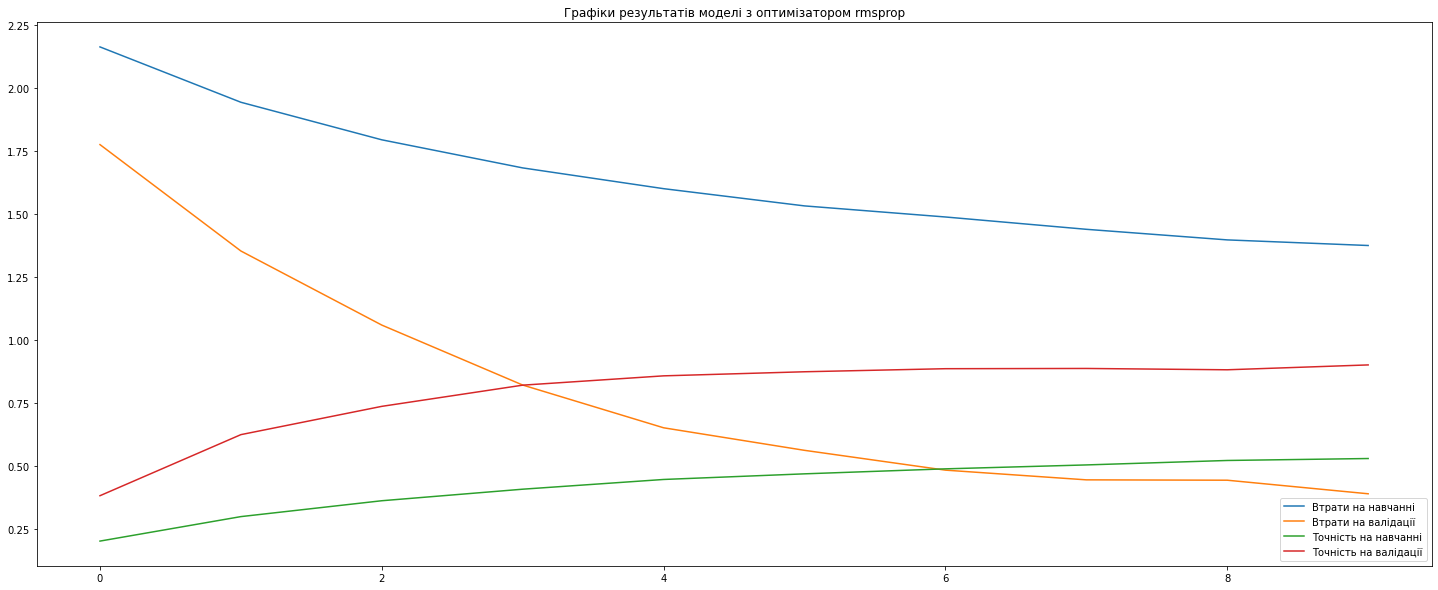

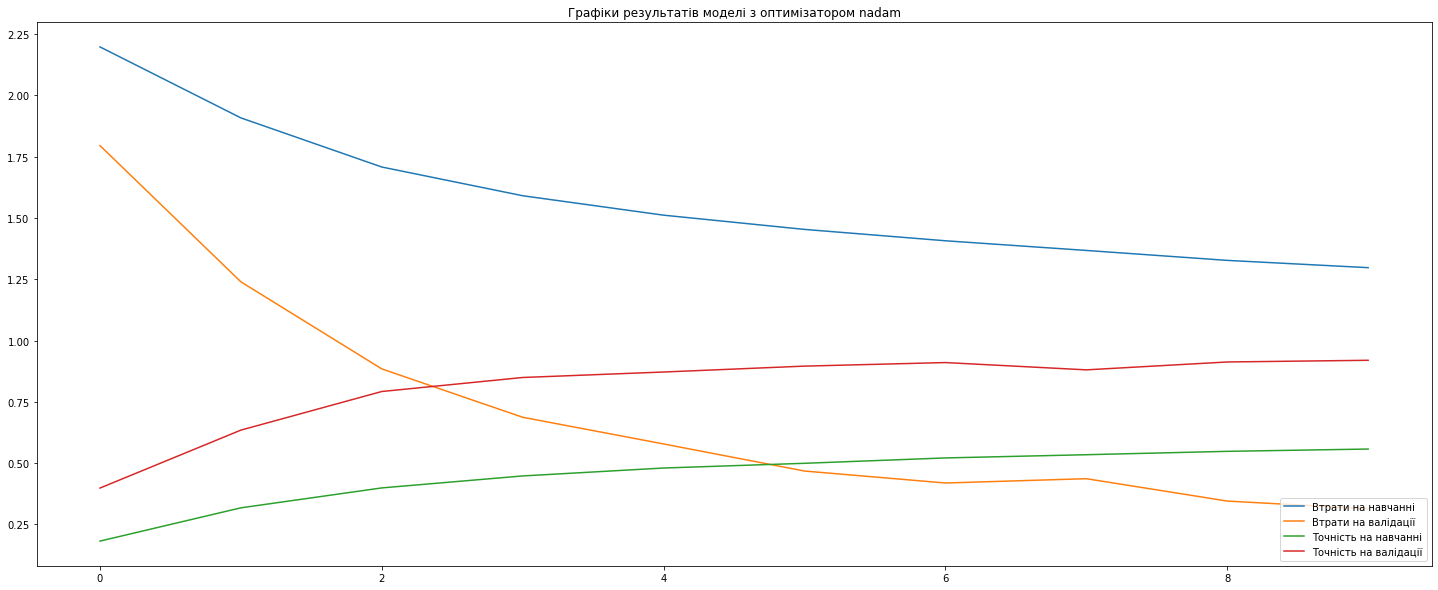

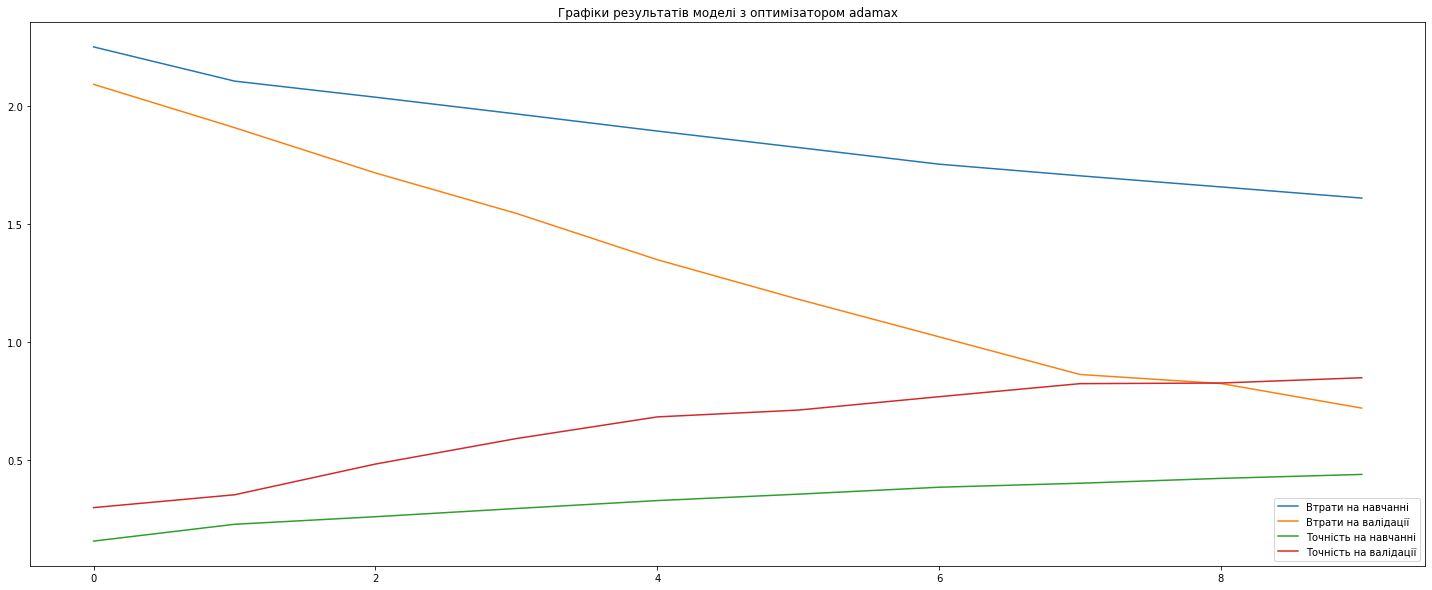

In [31]:
for i in range(4):
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  acc = histories[i].history['accuracy']
  val_acc = histories[i].history['val_accuracy']
  
  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Втрати на навчанні')
  plt.plot(epochs_range, val_loss, label='Втрати на валідації')
  plt.plot(epochs_range, acc, label='Точність на навчанні')
  plt.plot(epochs_range, val_acc, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки результатів моделі з оптимізатором {optimizer[i]}')

Проаналізувавши графіки, можна дійти до висноіку, що найкращий результат дав оптимізатор nadam показавши точність на валідаційних даних 0.92. Найгіршим в даній четвірці виявився adamax з результатом 0.95. Оптимізатори adam та rmsprop показали рівні результати по 0.90.

**Завдання 3. Поміняти розмірності ядер в конволюційних шарах – спробувати як квадратні так і
прямокутні ядра.**

In [34]:
kernels = [[[7, 7], [5, 5]],
           [[5, 5], [3, 3]],
           [[7, 5], [5, 3]],
           [[5, 4], [3, 2]]]
models = []

for i in range(4):
  models.append(Sequential([
                            Conv2D(filters = 8, kernel_size = (kernels[i][0][0],kernels[i][0][1]),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 16, kernel_size = (kernels[i][1][0],kernels[i][1][1]),padding = 'Same',
                                   activation ='relu'),
                            MaxPool2D(pool_size=(2,2), strides=(2,2)),
                            Dropout(0.25),
                           
                            Flatten(),
                            Dense(256, activation = "relu"),
                            Dropout(0.5),
                            Dense(10, activation = "softmax")]))

  models[i].compile(optimizer="adam",  loss = "categorical_crossentropy", metrics=["accuracy"])

In [35]:
histories = []

for i in range(4):
  histories.append(models[i].fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size))

Epoch 1/10
151/151 [==============================] - 37s 244ms/step - loss: 2.1676 - accuracy: 0.1941 - val_loss: 1.6218 - val_accuracy: 0.4657
Epoch 2/10
151/151 [==============================] - 37s 245ms/step - loss: 1.8209 - accuracy: 0.3576 - val_loss: 0.8239 - val_accuracy: 0.7986
Epoch 3/10
151/151 [==============================] - 36s 240ms/step - loss: 1.5799 - accuracy: 0.4574 - val_loss: 0.5092 - val_accuracy: 0.8883
Epoch 4/10
151/151 [==============================] - 37s 243ms/step - loss: 1.4424 - accuracy: 0.5066 - val_loss: 0.3784 - val_accuracy: 0.9214
Epoch 5/10
151/151 [==============================] - 37s 245ms/step - loss: 1.3491 - accuracy: 0.5432 - val_loss: 0.3080 - val_accuracy: 0.9212
Epoch 6/10
151/151 [==============================] - 37s 244ms/step - loss: 1.2782 - accuracy: 0.5665 - val_loss: 0.2503 - val_accuracy: 0.9312
Epoch 7/10
151/151 [==============================] - 37s 242ms/step - loss: 1.2390 - accuracy: 0.5774 - val_loss: 0.2285 - val_ac

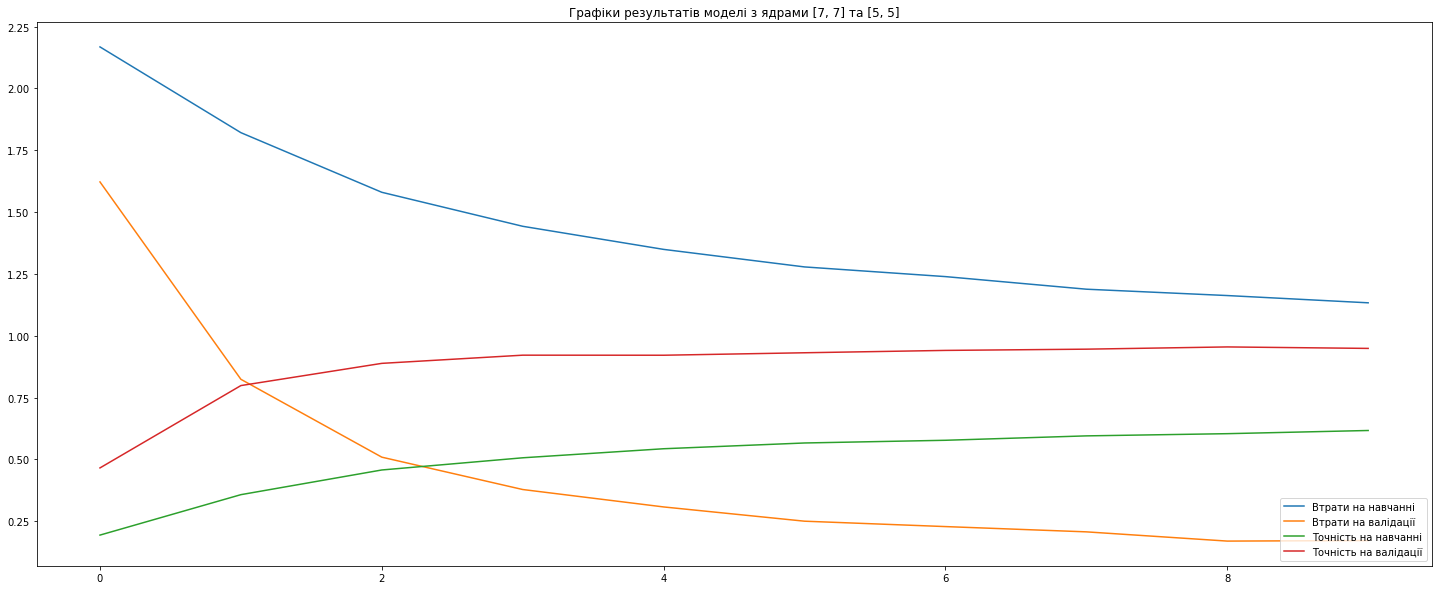

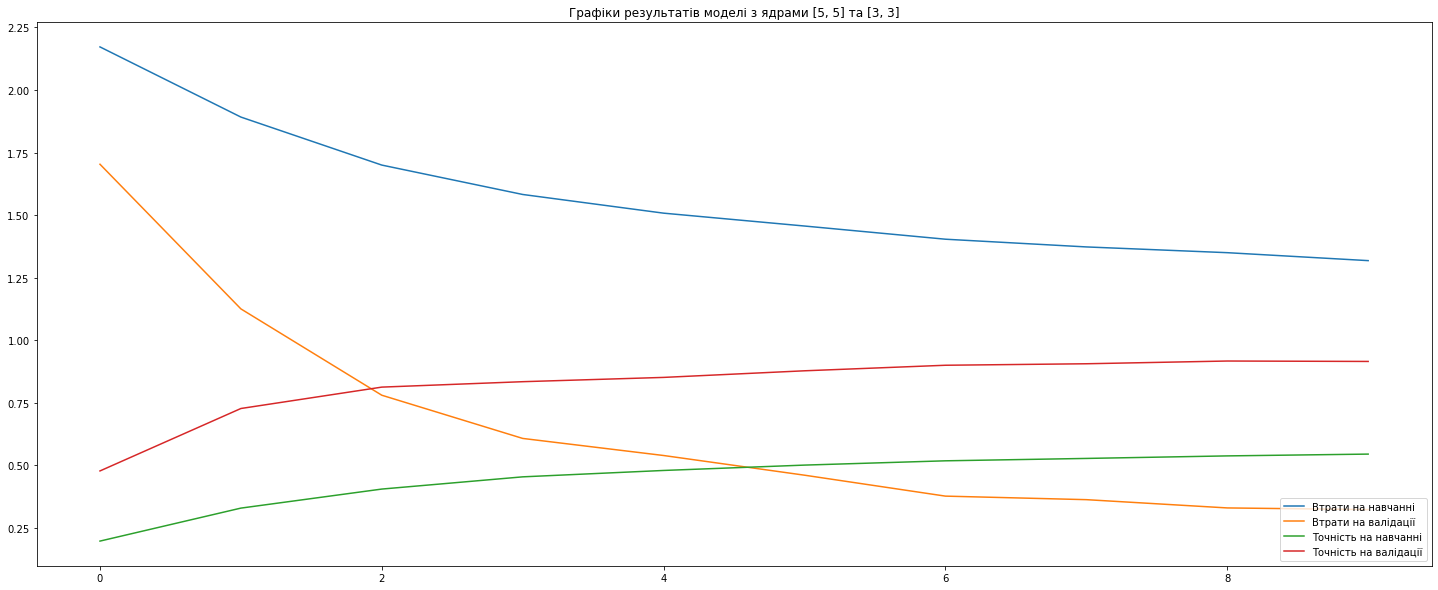

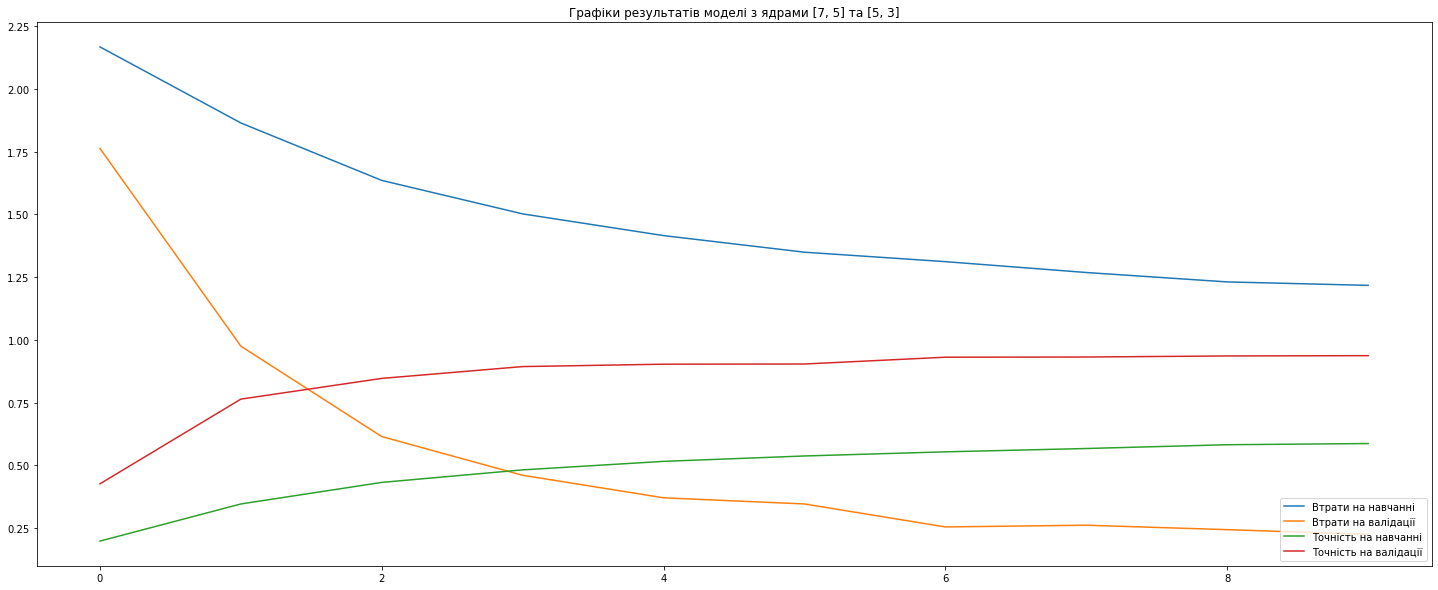

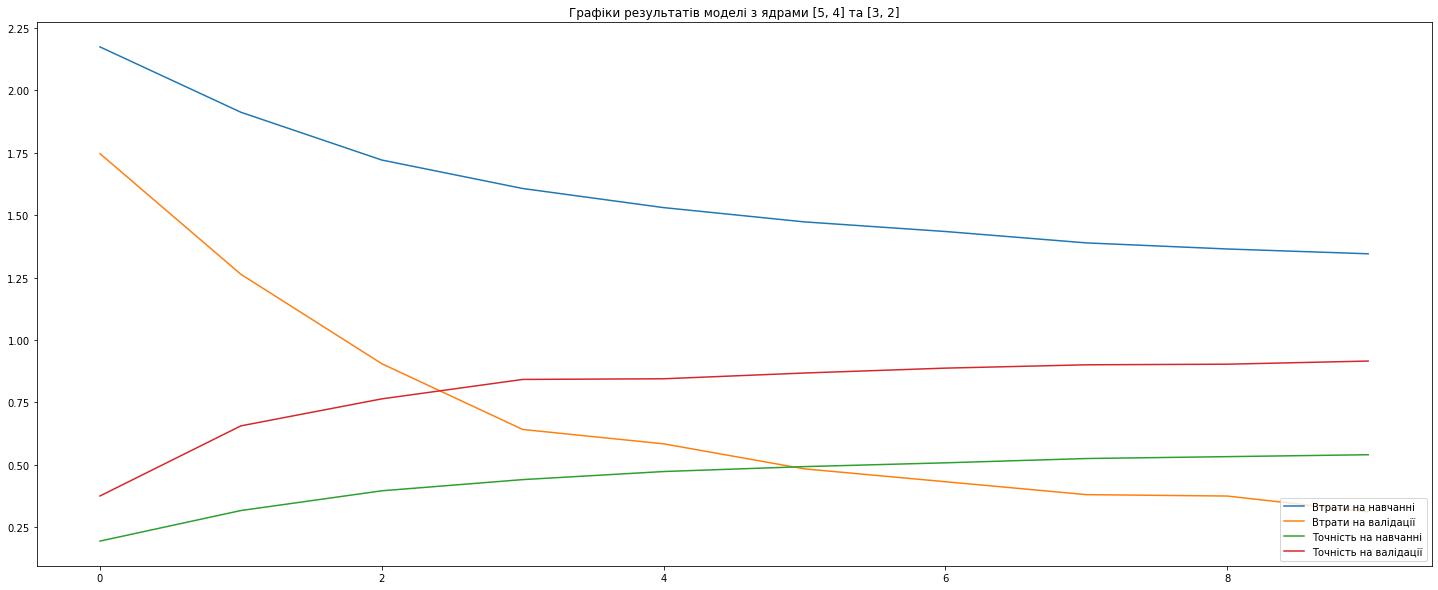

In [36]:
for i in range(4):
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  acc = histories[i].history['accuracy']
  val_acc = histories[i].history['val_accuracy']
  
  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Втрати на навчанні')
  plt.plot(epochs_range, val_loss, label='Втрати на валідації')
  plt.plot(epochs_range, acc, label='Точність на навчанні')
  plt.plot(epochs_range, val_acc, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки результатів моделі з ядрами {kernels[i][0]} та {kernels[i][1]}')

Дослідивши графіки чітко видно, що моделі з більшими ядрами дали більш точний результат. Так, модель з ядрами 7х7 та 5х5 показали точність в 0.95, а модель з ядрами 7х5 та 5х3 - 0.93.

**Завдання 4. Додати додаткові шари конволюції і дослідити вплив на точність розпізнавання.**

In [37]:
models = []

models.append(Sequential([
                            Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                                   activation ='relu'),
                            MaxPool2D(pool_size=(2,2), strides=(2,2)),
                            Dropout(0.25),
                           
                            Flatten(),
                            Dense(256, activation = "relu"),
                            Dropout(0.5),
                            Dense(10, activation = "softmax")]))

models.append(Sequential([
                            Conv2D(filters = 4, kernel_size = (7,7),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                                   activation ='relu'),
                            MaxPool2D(pool_size=(2,2), strides=(2,2)),
                            Dropout(0.25),
                           
                            Flatten(),
                            Dense(256, activation = "relu"),
                            Dropout(0.5),
                            Dense(10, activation = "softmax")]))

models[0].compile(optimizer="adam",  loss = "categorical_crossentropy", metrics=["accuracy"])
models[1].compile(optimizer="adam",  loss = "categorical_crossentropy", metrics=["accuracy"])

In [38]:
histories = []

for i in range(2):
  histories.append(models[i].fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size))

Epoch 1/10
151/151 [==============================] - 27s 172ms/step - loss: 2.1898 - accuracy: 0.1872 - val_loss: 1.7122 - val_accuracy: 0.5331
Epoch 2/10
151/151 [==============================] - 26s 171ms/step - loss: 1.8752 - accuracy: 0.3306 - val_loss: 1.1771 - val_accuracy: 0.6707
Epoch 3/10
151/151 [==============================] - 26s 171ms/step - loss: 1.6782 - accuracy: 0.4147 - val_loss: 0.8514 - val_accuracy: 0.7702
Epoch 4/10
151/151 [==============================] - 26s 171ms/step - loss: 1.5738 - accuracy: 0.4546 - val_loss: 0.7079 - val_accuracy: 0.8169
Epoch 5/10
151/151 [==============================] - 26s 169ms/step - loss: 1.4977 - accuracy: 0.4820 - val_loss: 0.6040 - val_accuracy: 0.8417
Epoch 6/10
151/151 [==============================] - 26s 170ms/step - loss: 1.4420 - accuracy: 0.4987 - val_loss: 0.4685 - val_accuracy: 0.8857
Epoch 7/10
151/151 [==============================] - 26s 169ms/step - loss: 1.3909 - accuracy: 0.5219 - val_loss: 0.4288 - val_ac

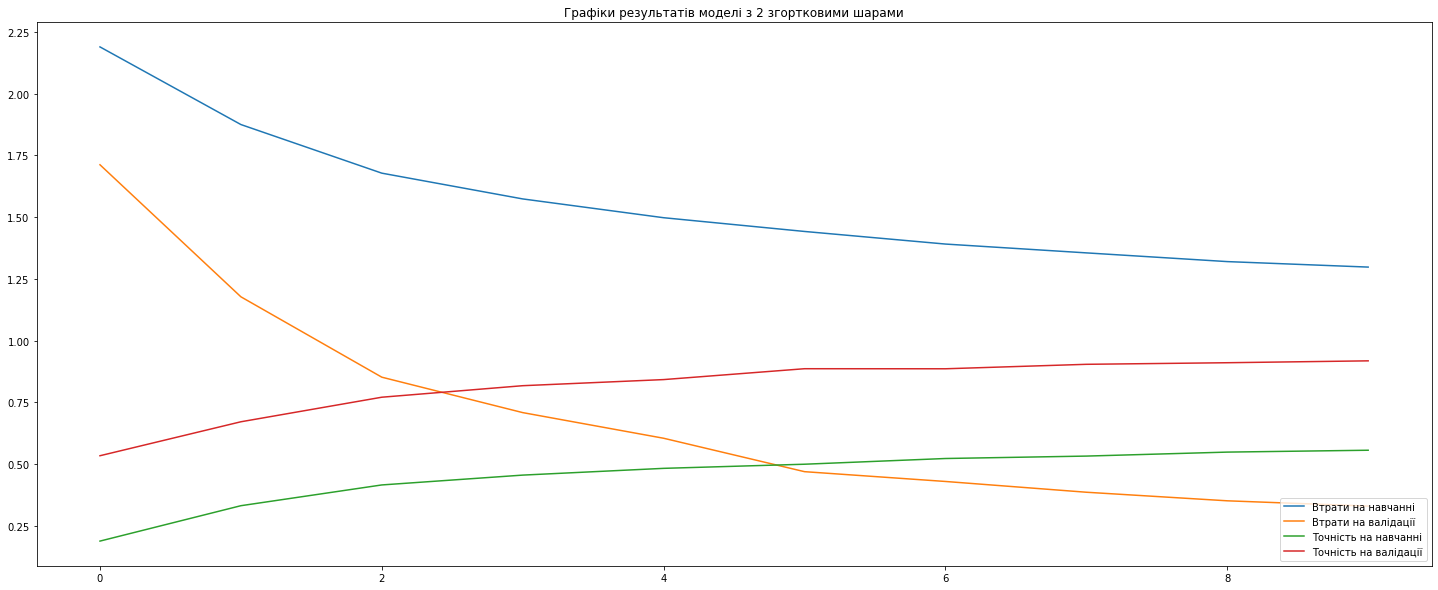

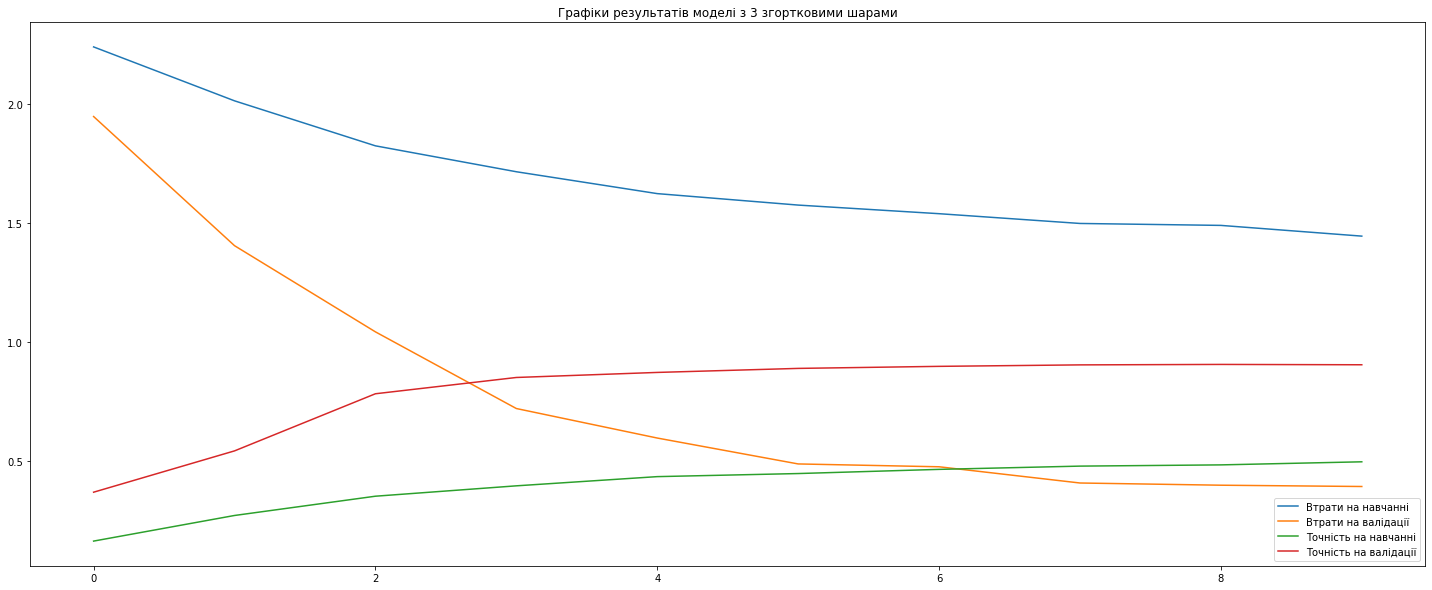

In [39]:
for i in range(2):
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  acc = histories[i].history['accuracy']
  val_acc = histories[i].history['val_accuracy']
  
  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Втрати на навчанні')
  plt.plot(epochs_range, val_loss, label='Втрати на валідації')
  plt.plot(epochs_range, acc, label='Точність на навчанні')
  plt.plot(epochs_range, val_acc, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки результатів моделі з {i+2} згортковими шарами')

Мережа з двома згортковими шарами показала результат 0.91, в той час я мережа з 3 згортковими шарами показала трохи менше - 0.90. Це свідчить про те, що для даного датасету 3 згортковий шар з шаром макс пулінгу зайвий, оскільки зображення має вкрай малу роздільну здатність.

**Завдання 5. Зробити експерименти з різними параметрами аугментації даних.**

In [50]:
models = []

for i in range(4):
  models.append(Sequential([
                            Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                                   activation ='relu'),
                            MaxPool2D(pool_size=(2,2), strides=(2,2)),
                            Dropout(0.25),
                           
                            Flatten(),
                            Dense(256, activation = "relu"),
                            Dropout(0.5),
                            Dense(10, activation = "softmax")]))

  models[i].compile(optimizer="adam",  loss = "categorical_crossentropy", metrics=["accuracy"])

In [51]:
datagens = []
value = 10
for i in range(4):
  datagens.append(ImageDataGenerator(
  featurewise_center=False, # set input mean to 0 over the dataset
  samplewise_center=False, # set each sample mean to 0
  featurewise_std_normalization=False, # divide inputs by std of the dataset
  samplewise_std_normalization=False, # divide each input by its std
  zca_whitening=False, # dimesion reduction
  rotation_range=value, # randomly rotate images in the range 5 degrees
  zoom_range = value / 100, # Randomly zoom image 5%
  width_shift_range = value / 100, # randomly shift images horizontally 5%
  height_shift_range =value / 100, # randomly shift images vertically 5%
  horizontal_flip=False, # randomly flip images
  vertical_flip=False)) # randomly flip images
  datagens[i].fit(X_train)
  value += 10

In [52]:
histories = []

for i in range(4):
  histories.append(models[i].fit_generator(datagens[i].flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size))

Epoch 1/10
151/151 [==============================] - 27s 175ms/step - loss: 1.0498 - accuracy: 0.6504 - val_loss: 0.1999 - val_accuracy: 0.9488
Epoch 2/10
151/151 [==============================] - 25s 167ms/step - loss: 0.4272 - accuracy: 0.8658 - val_loss: 0.1297 - val_accuracy: 0.9638
Epoch 3/10
151/151 [==============================] - 26s 169ms/step - loss: 0.3254 - accuracy: 0.8978 - val_loss: 0.1092 - val_accuracy: 0.9671
Epoch 4/10
151/151 [==============================] - 26s 170ms/step - loss: 0.2901 - accuracy: 0.9099 - val_loss: 0.0946 - val_accuracy: 0.9731
Epoch 5/10
151/151 [==============================] - 26s 171ms/step - loss: 0.2505 - accuracy: 0.9209 - val_loss: 0.0822 - val_accuracy: 0.9745
Epoch 6/10
151/151 [==============================] - 26s 171ms/step - loss: 0.2304 - accuracy: 0.9279 - val_loss: 0.0767 - val_accuracy: 0.9760
Epoch 7/10
151/151 [==============================] - 26s 172ms/step - loss: 0.2162 - accuracy: 0.9346 - val_loss: 0.0717 - val_ac

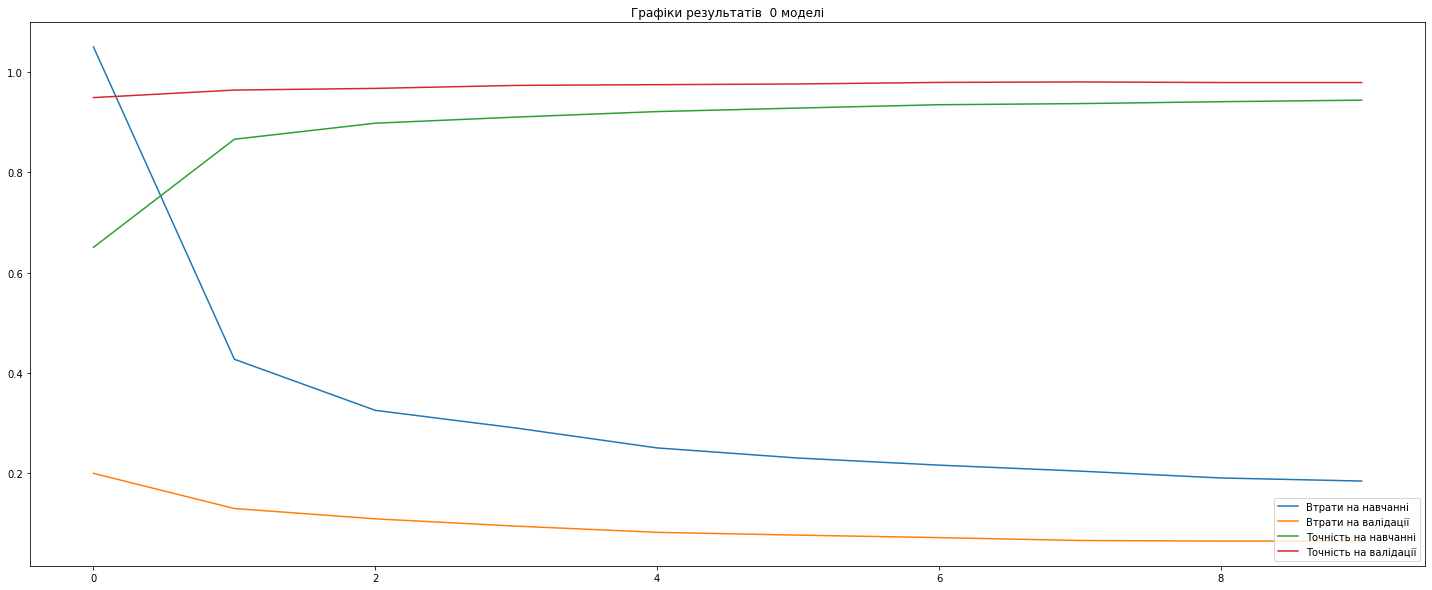

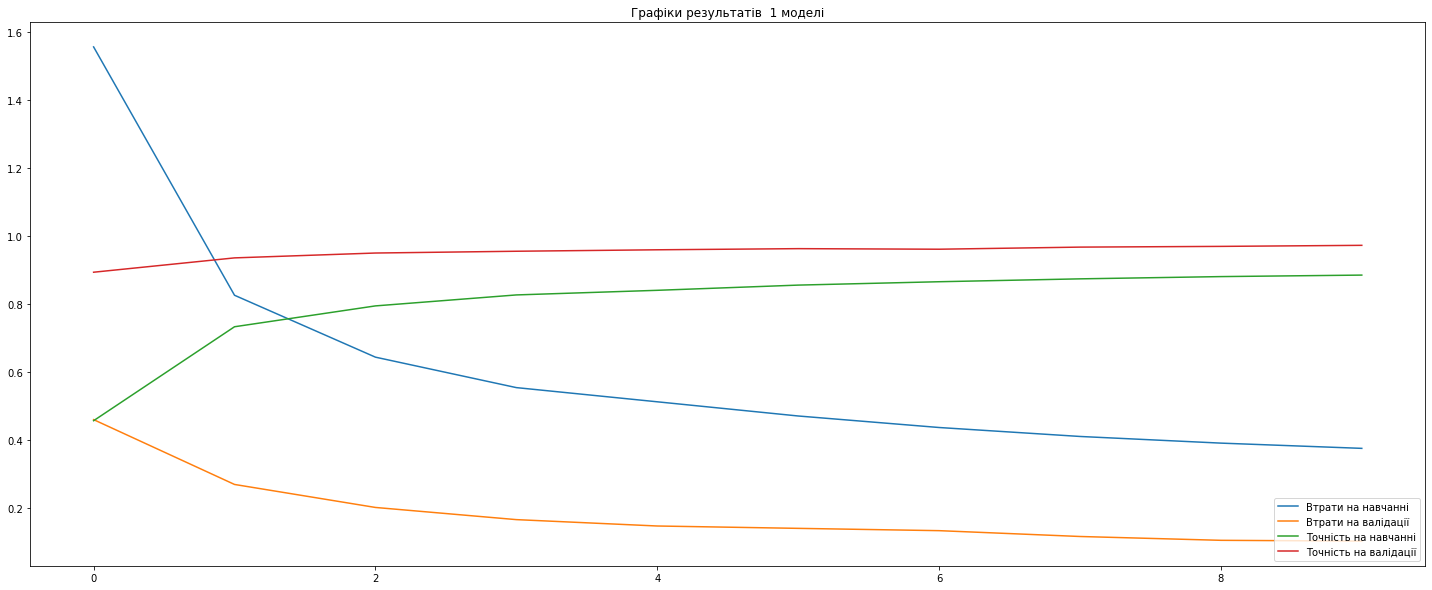

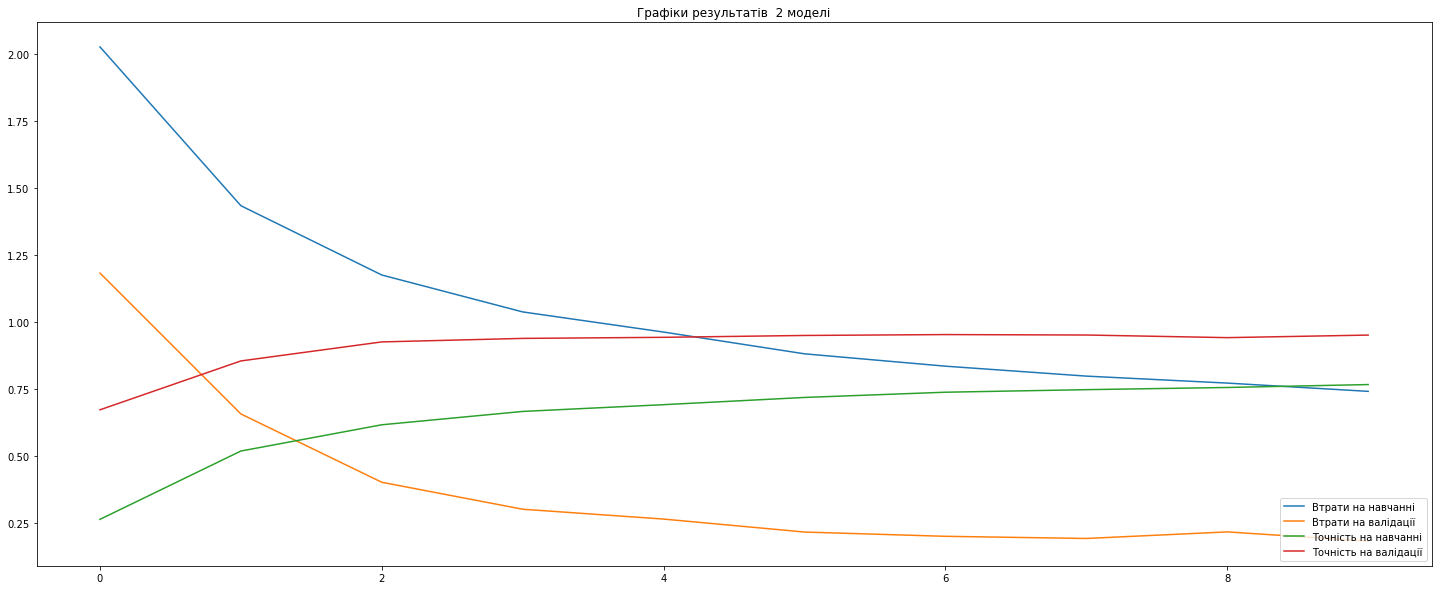

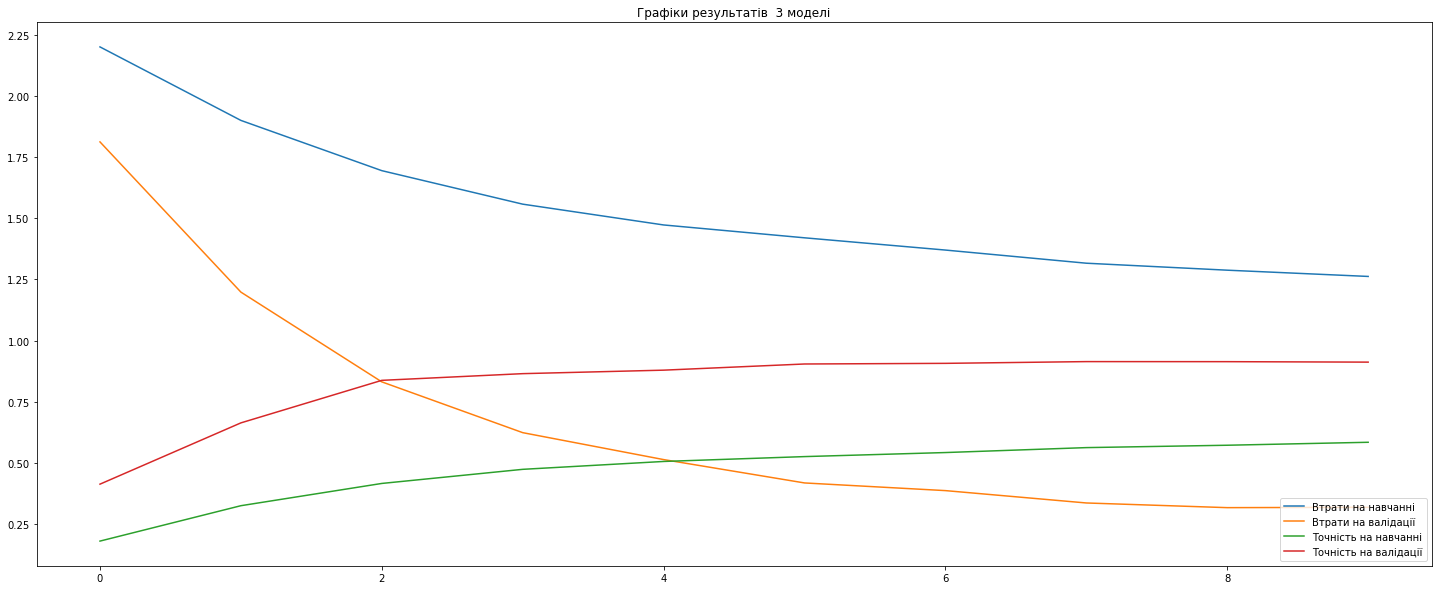

In [54]:
for i in range(4):
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  acc = histories[i].history['accuracy']
  val_acc = histories[i].history['val_accuracy']
  
  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Втрати на навчанні')
  plt.plot(epochs_range, val_loss, label='Втрати на валідації')
  plt.plot(epochs_range, acc, label='Точність на навчанні')
  plt.plot(epochs_range, val_acc, label='Точність на валідації')
  plt.legend(loc='lower right')
  plt.title(f'Графіки результатів  {i} моделі')

**Завдання на максимальний бал. 2. Порівняти точність розробленої мережі в попередньому завданні з точністю розпізнавання
LeNet-5 CNN.**

In [17]:
models = []
models.append(Sequential([
                            Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                                   activation ='relu', input_shape = (28,28,1)),
                            MaxPool2D(pool_size=(2,2)),
                            Dropout(0.25),
                            
                            Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                                   activation ='relu'),
                            MaxPool2D(pool_size=(2,2), strides=(2,2)),
                            Dropout(0.25),
                           
                            Flatten(),
                            Dense(256, activation = "relu"),
                            Dropout(0.5),
                            Dense(10, activation = "softmax")]))

models.append(Sequential([
                          Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',
                                 input_shape=(28, 28, 1)),
                          MaxPool2D(strides=2),
                          
                          Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'),
                          MaxPool2D(strides=2),
                          
                          Flatten(),
                          Dense(256, activation='relu'),
                          Dense(84, activation='relu'),
                          Dense(10, activation='softmax')]))

models[0].compile(optimizer="adam",  loss = "categorical_crossentropy", metrics=["accuracy"])
models[1].compile(optimizer="adam",  loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
datagen = ImageDataGenerator(
featurewise_center=False, # set input mean to 0 over the dataset
samplewise_center=False, # set each sample mean to 0
featurewise_std_normalization=False, # divide inputs by std of the dataset
samplewise_std_normalization=False, # divide each input by its std
zca_whitening=False, # dimesion reduction
rotation_range=0.5, # randomly rotate images in the range 5 degrees
zoom_range = 0.5, # Randomly zoom image 5%
width_shift_range=0.5, # randomly shift images horizontally 5%
height_shift_range=0.5, # randomly shift images vertically 5%
horizontal_flip=False, # randomly flip images
vertical_flip=False) # randomly flip images
datagen.fit(X_train)

In [19]:
histories = []

for i in range(2):
  histories.append(models[i].fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size))

Epoch 1/10
151/151 [==============================] - 28s 183ms/step - loss: 2.1499 - accuracy: 0.2078 - val_loss: 1.5581 - val_accuracy: 0.5648
Epoch 2/10
151/151 [==============================] - 28s 182ms/step - loss: 1.8390 - accuracy: 0.3460 - val_loss: 1.0254 - val_accuracy: 0.7469
Epoch 3/10
151/151 [==============================] - 28s 182ms/step - loss: 1.6582 - accuracy: 0.4179 - val_loss: 0.7879 - val_accuracy: 0.7664
Epoch 4/10
151/151 [==============================] - 28s 183ms/step - loss: 1.5636 - accuracy: 0.4565 - val_loss: 0.6436 - val_accuracy: 0.8250
Epoch 5/10
151/151 [==============================] - 28s 186ms/step - loss: 1.4873 - accuracy: 0.4893 - val_loss: 0.5190 - val_accuracy: 0.8629
Epoch 6/10
151/151 [==============================] - 28s 187ms/step - loss: 1.4469 - accuracy: 0.5018 - val_loss: 0.4904 - val_accuracy: 0.8683
Epoch 7/10
151/151 [==============================] - 28s 187ms/step - loss: 1.4010 - accuracy: 0.5179 - val_loss: 0.3849 - val_ac

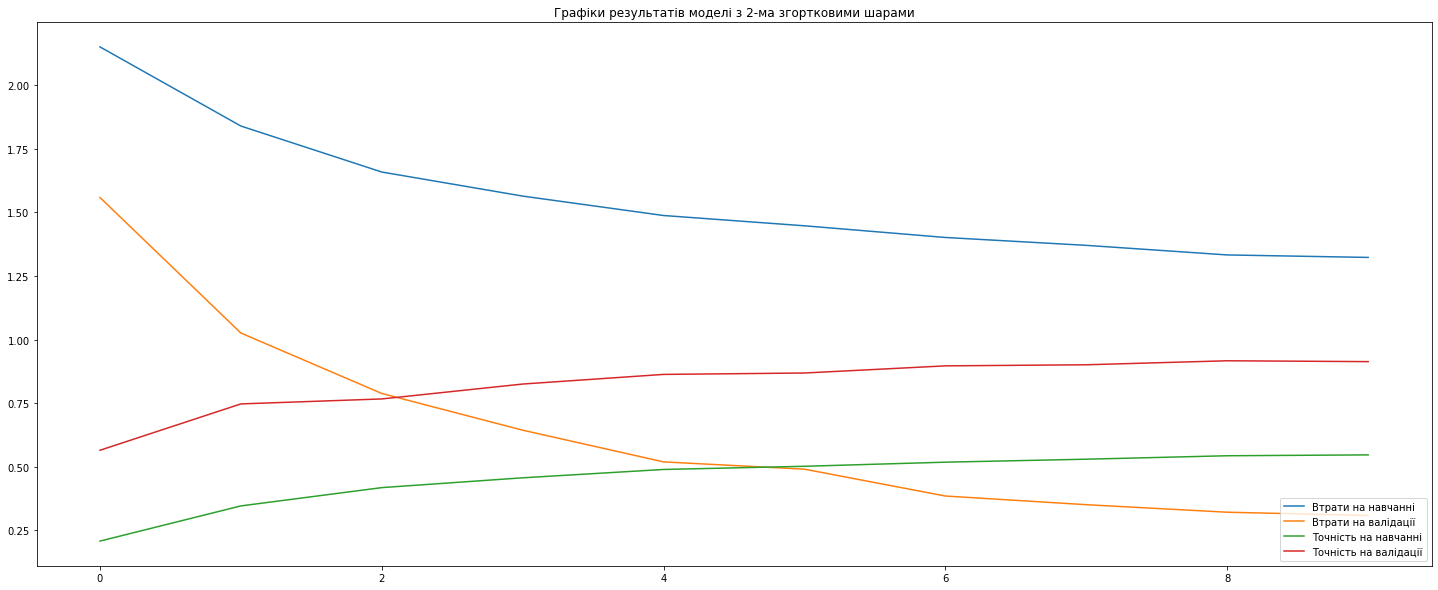

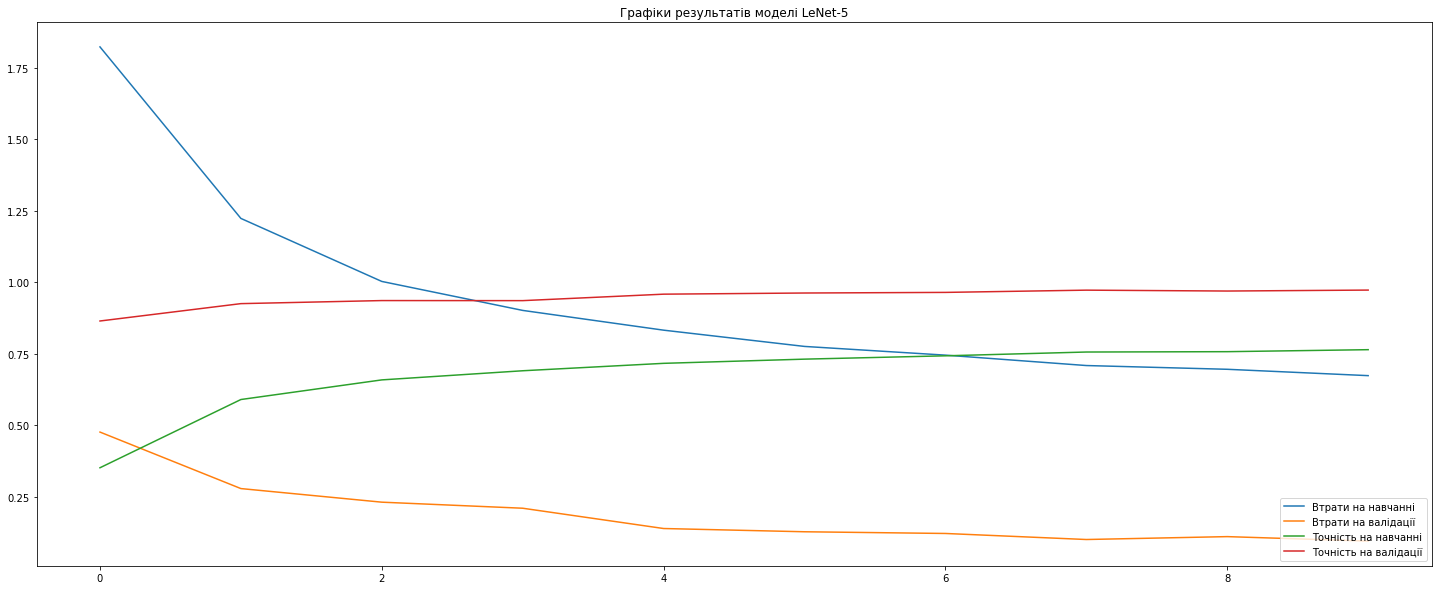

In [20]:
for i in range(2):
  loss = histories[i].history['loss']
  val_loss = histories[i].history['val_loss']
  acc = histories[i].history['accuracy']
  val_acc = histories[i].history['val_accuracy']
  
  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.plot(epochs_range, loss, label='Втрати на навчанні')
  plt.plot(epochs_range, val_loss, label='Втрати на валідації')
  plt.plot(epochs_range, acc, label='Точність на навчанні')
  plt.plot(epochs_range, val_acc, label='Точність на валідації')
  plt.legend(loc='lower right')
  if i == 0:
    plt.title(f'Графіки результатів моделі з 2-ма згортковими шарами')
  else:
    plt.title(f'Графіки результатів моделі LeNet-5')

In [22]:
scores = []
for i in range(2):
  scores.append(models[i].evaluate(X_val, Y_val, batch_size=32))
for i in range(2):
  print(scores[i])

132/132 [==============================] - 2s 13ms/step - loss: 0.0947 - accuracy: 0.9724
[0.3084986209869385, 0.913095235824585]
[0.09469778090715408, 0.9723809361457825]


Як видно з графіків та результатів, мережа LeNet показала кращий результат, видавши точність 0.97, в той час як наша - 0.91. Проте варто відзначити, що ціною такої точності стало збільшення часу навчання вдвічі.